## Importacion de las librerias necesarias

In [1]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import MySQLdb
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib.dates import drange

## Parametros para establecer conexion con la base de datos

In [2]:
db_data = 'mysql+mysqldb://' + 'root' + ':' + 'M4110rca' + '@' + 'localhost' + ':3306/' \
       + 'primeit' + '?charset=utf8mb4'

## Creacion de conexion con la base de datos

In [3]:
engine = create_engine(db_data)

## Carga de la tabla de la base de datos

In [4]:
df_from_db = pd.read_sql_table('prueba_analisisdatos', engine)
df_from_db.head(5)

,id_reserva,fecha_reserva,pvp_reserva,coste_reserva
0,72000000,1/8/2022,"799,57","794,68"
1,72000001,1/8/2022,832,"806,82"
2,72000002,1/8/2022,890,864
3,72000003,1/8/2022,"686,72","672,99"
4,72000004,1/8/2022,1053,1022


## Limpieza y transformacion de datos

In [5]:
def clean_and_transform_data(data):
    data['fecha_reserva'] = pd.to_datetime(data['fecha_reserva'], errors ='coerce', format = "%d/%m/%Y")
    data['coste_reserva'] = data['coste_reserva'].apply(lambda x: float(x.split()[0].replace(',', '.')))
    data['pvp_reserva'] = data['pvp_reserva'].apply(lambda x: float(x.split()[0].replace(',', '.')))
    
    return data

In [6]:
df_from_db = clean_and_transform_data(df_from_db)
df_from_db

,id_reserva,fecha_reserva,pvp_reserva,coste_reserva
0,72000000,2022-08-01,799.57,794.68
1,72000001,2022-08-01,832.00,806.82
2,72000002,2022-08-01,890.00,864.00
3,72000003,2022-08-01,686.72,672.99
4,72000004,2022-08-01,1053.00,1022.00
...,...,...,...,...
132764,72135785,2022-08-31,1522.43,219.23
132765,72135786,2022-08-31,2327.78,344.05
132766,72135787,2022-08-31,4597.00,492.94
132767,72135788,2022-08-31,1297.42,173.78


## Propiedades estadisticas de la tabla df_from_db

In [7]:
df_from_db.describe()

,id_reserva,pvp_reserva,coste_reserva
count,1.327690e+05,132769.000000,132769.000000
mean,7.206688e+07,645.979911,604.443439
std,3.905166e+04,908.005855,992.038993
min,7.200000e+07,-248.210000,-532.160000
25%,7.203319e+07,154.000000,146.630000
50%,7.206638e+07,356.710000,340.920000
75%,7.209958e+07,790.000000,748.550000
max,7.213579e+07,49205.000000,102633.950000


## Cantidad Vendida y Cantidad ganada durante el mes

In [44]:
Ganancias_mes = df_from_db['pvp_reserva'].sum() - df_from_db['coste_reserva'].sum()
print('Cantidad Vendida:',df_from_db['pvp_reserva'].sum())
print('Cantidad ganada:',Ganancias_mes)

Cantidad Vendida: 85766106.83
Cantidad ganada: 5514755.860000014


## Grafica de la evolucion temporal de la ventas

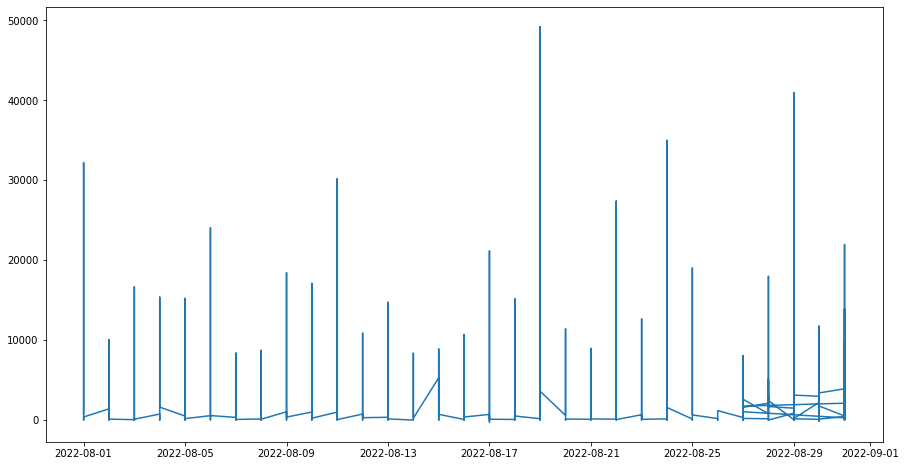

In [9]:
xpoints = df_from_db['fecha_reserva']
ypoints = df_from_db['pvp_reserva']

plt.figure(figsize=(15,8))
plt.plot(xpoints, ypoints)
plt.show()

## Outliers encontrado en la columna pvp_reserva

In [10]:
df_from_db[df_from_db['pvp_reserva'] == -248.21]

,id_reserva,fecha_reserva,pvp_reserva,coste_reserva
72822,72072822,2022-08-17,-248.21,0.0


## Outliers encontrados en la columna coste_reserva 
## Vemos que hay valores negativos para los costes de reserva

In [11]:
df_from_db[df_from_db['coste_reserva'] < 0]

,id_reserva,fecha_reserva,pvp_reserva,coste_reserva
53284,72053284,2022-08-12,0.00,-0.14
54369,72054369,2022-08-12,3527.00,-532.16
86864,72086864,2022-08-20,-23.01,-27.59
88053,72088053,2022-08-20,23.00,-1.00
93941,72093941,2022-08-22,0.00,-84.00
93962,72093962,2022-08-22,0.00,-84.00


## Filtros de la data por fines de semana

In [26]:
df_primer_weekend = df_from_db[(df_from_db.fecha_reserva >= '2022-08-05') & (df_from_db.fecha_reserva <= '2022-08-07') ]

In [27]:
df_segundo_weekend = df_from_db[(df_from_db.fecha_reserva >= '2022-08-12') & (df_from_db.fecha_reserva <= '2022-08-14') ]

In [28]:
df_tercer_weekend = df_from_db[(df_from_db.fecha_reserva >= '2022-08-19') & (df_from_db.fecha_reserva <= '2022-08-21') ]

In [29]:
df_cuarto_weekend = df_from_db[(df_from_db.fecha_reserva >= '2022-08-26') & (df_from_db.fecha_reserva <= '2022-08-28') ]

## Data historica de los fines de semana

In [39]:
df_weekend = pd.concat([df_primer_weekend, df_segundo_weekend, df_tercer_weekend, df_cuarto_weekend])
df_weekend

,id_reserva,fecha_reserva,pvp_reserva,coste_reserva
21020,72021020,2022-08-05,498.00,447.98
21021,72021021,2022-08-05,334.92,334.92
21022,72021022,2022-08-05,212.70,200.34
21023,72021023,2022-08-05,136.68,132.99
21024,72021024,2022-08-05,94.61,91.11
...,...,...,...,...
132592,72135613,2022-08-28,2582.04,968.65
132593,72135614,2022-08-28,1457.25,635.87
132594,72135615,2022-08-28,2733.40,1515.07
132595,72135616,2022-08-28,1551.56,1080.38


## Ganancias los fines de semana

In [42]:
ganancia_weekend = df_weekend.pvp_reserva.sum()-df_weekend.coste_reserva.sum()

In [43]:
print(ganancia_weekend)

1251720.5300000012


## Ganancias entre semana

In [45]:
ganancias_non_weekend = Ganancias_mes - ganancia_weekend

In [46]:
print(ganancias_non_weekend)

4263035.330000013
